In [2]:
from carvekit.ml.files.models_loc import download_all

In [3]:
download_all()

In [4]:
import os
import numpy as np
from PIL import Image, ImageOps
from carvekit.web.schemas.config import MLConfig
from carvekit.web.utils.init_utils import init_interface

SHOW_FULLSIZE = False # Shows image in full size (may take a long time to load)
PREPROCESSING_METHOD = "none" #param ["stub", "none"] Preprocessing method
SEGMENTATION_NETWORK = "tracer_b7" #param ["u2net", "deeplabv3", "basnet", "tracer_b7"] Segmentation network. Use `u2net` for hairs-like objects and `tracer_b7` for objects
POSTPROCESSING_METHOD = "fba" #param ["fba", "none"]  Postprocessing method
SEGMENTATION_MASK_SIZE = 640 #param ["640", "320"] {type:"raw", allow-input: true} Segmentation mask size. Use 640 for Tracer B7 and 320 for U2Net
TRIMAP_DILATION = 30 #param {type:"integer"}  The size of the offset radius from the object mask in pixels when forming an unknown area
TRIMAP_EROSION = 5 #param {type:"integer"} The number of iterations of erosion that the object's mask will be subjected to before forming an unknown area
DEVICE = 'cuda' # ['cuda', 'cpu']

config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)

interface = init_interface(config)

In [5]:
imgs = ['/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/upper_body/images/000000_1.jpg', 
        '/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/lower_body/images/013563_1.jpg', 
        '/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dresses/images/020714_1.jpg']

# imgs = []
# root = '/content/cloth'
# for name in os.listdir(root):
#     imgs.append(root + '/' + name)

In [6]:
images = interface(imgs)

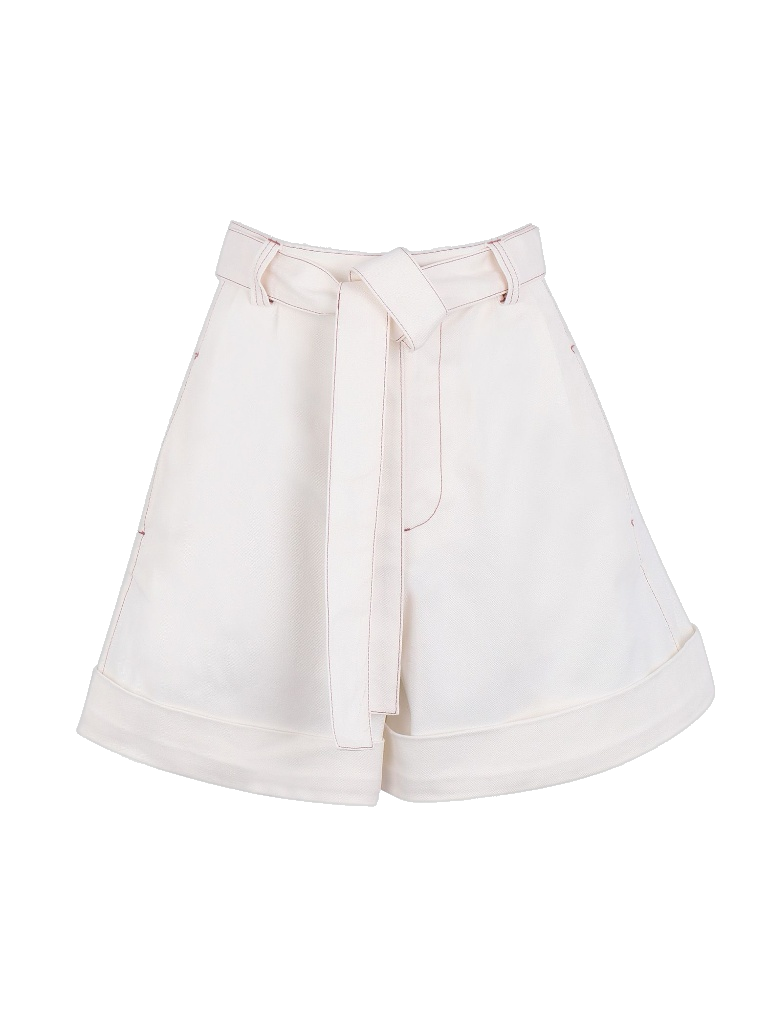

In [36]:
images[1]

In [25]:
img = np.array(images[0])
img = img[...,:3] # no transparency

In [26]:
np.unique(img)

array([  2,   4,   6,   7,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [12]:
img.shape

(1024, 768, 3)

In [27]:
idx = (img[...,0]==130)&(img[...,1]==130)&(img[...,2]==130) # 흑백인 위치 0 또는 130

In [28]:
idx

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [29]:
idx.shape

(1024, 768)

In [30]:
# find the indices where the values are True
indices = np.where(idx)


print("Indices of True values:")
print(indices)

Indices of True values:
(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  0,   1,   2, ..., 765, 766, 767]))


In [31]:
img = np.ones(idx.shape)*255

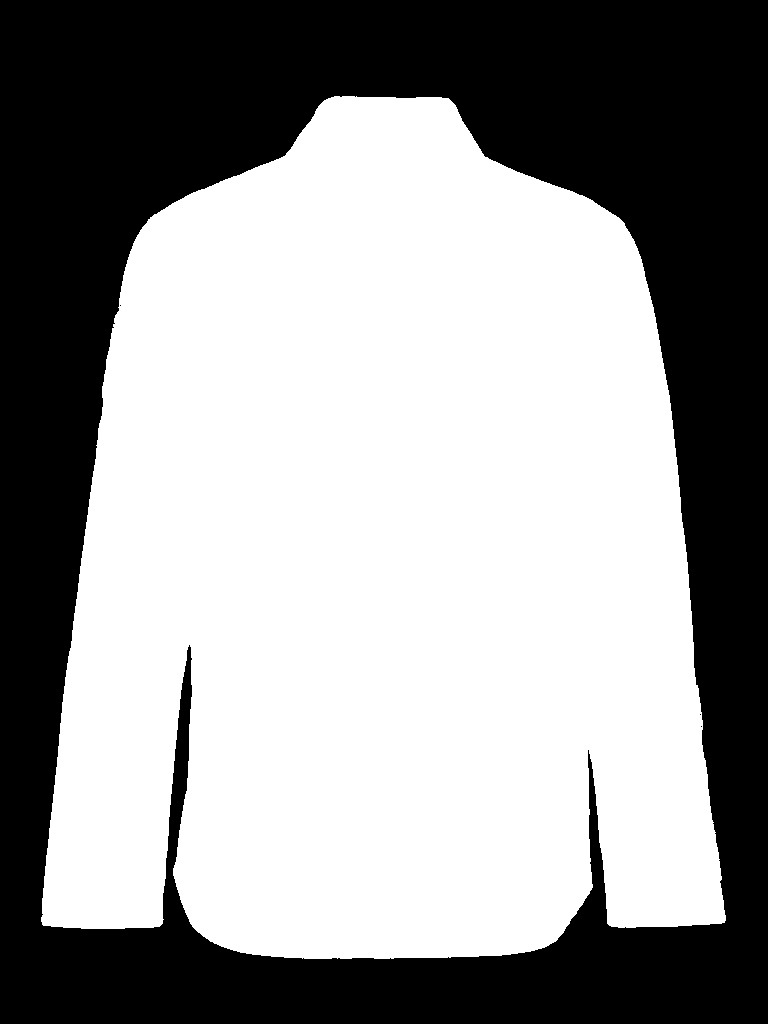

In [32]:
img[idx] = 0
img = Image.fromarray(np.uint8(img), 'L')
img

In [37]:
for i, im in enumerate(images):
    img = np.array(im)
    img = img[...,:3] # no transparency
    idx = (img[...,0]==130)&(img[...,1]==130)&(img[...,2]==130) # background 0 or 130, just try it
    img = np.ones(idx.shape)*255
    img[idx] = 0
    im = Image.fromarray(np.uint8(img), 'L')
    im.save(f'/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/{imgs[i].split("/")[-1].split(".")[0]}.jpg')